<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.595737,59.240027,54.767261,-6.165188,176.437836,182.889404,-6.451568
1,0.0,1.0,92.407234,69.948316,55.891130,1.242921,229.489601,228.873441,0.616160
2,0.0,2.0,56.545943,55.221915,27.148656,1.217268,150.133782,149.251242,0.882540
3,0.0,3.0,34.460489,45.356931,93.676429,0.579417,184.073266,183.501537,0.571729
4,0.0,4.0,67.476611,27.149352,67.647217,3.559198,175.832378,172.826717,3.005661
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.947470,63.713648,94.131208,1.889000,192.681325,190.845314,1.836011
249996,999.0,246.0,78.283559,67.473854,80.682453,-0.928763,235.511104,236.505948,-0.994845
249997,999.0,247.0,56.872769,31.372063,25.979693,-1.160127,123.064398,124.386623,-1.322224
249998,999.0,248.0,60.993599,42.318475,27.612926,1.413198,142.338197,141.002281,1.335916


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.595737,59.240027,54.767261,-6.165188,176.437836,182.889404,-6.451568
1,0.0,1.0,92.407234,69.948316,55.891130,1.242921,229.489601,228.873441,0.616160
2,0.0,2.0,56.545943,55.221915,27.148656,1.217268,150.133782,149.251242,0.882540
3,0.0,3.0,34.460489,45.356931,93.676429,0.579417,184.073266,183.501537,0.571729
4,0.0,4.0,67.476611,27.149352,67.647217,3.559198,175.832378,172.826717,3.005661
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.947470,63.713648,94.131208,1.889000,192.681325,190.845314,1.836011
249996,999.0,246.0,78.283559,67.473854,80.682453,-0.928763,235.511104,236.505948,-0.994845
249997,999.0,247.0,56.872769,31.372063,25.979693,-1.160127,123.064398,124.386623,-1.322224
249998,999.0,248.0,60.993599,42.318475,27.612926,1.413198,142.338197,141.002281,1.335916


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    58.595737  59.240027  54.767261  ...  176.437836  182.889404 -6.451568
      1.0    92.407234  69.948316  55.891130  ...  229.489601  228.873441  0.616160
      2.0    56.545943  55.221915  27.148656  ...  150.133782  149.251242  0.882540
      3.0    34.460489  45.356931  93.676429  ...  184.073266  183.501537  0.571729
      4.0    67.476611  27.149352  67.647217  ...  175.832378  172.826717  3.005661
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.947470  63.713648  94.131208  ...  192.681325  190.845314  1.836011
      246.0  78.283559  67.473854  80.682453  ...  235.511104  236.505948 -0.994845
      247.0  56.872769  31.372063  25.979693  ...  123.064398  124.386623 -1.322224
      248.0  60.993599  42.318475  27.612926  ...  142.338197  141.002281  1.335916
      249.0  42.248557  78.423610  67.342291  ...  197.258194  197.876377 -0.618182

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    58.595737  59.240027  54.767261  ...  176.437836  182.889404 -6.451568
      1.0    92.407234  69.948316  55.891130  ...  229.489601  228.873441  0.616160
      2.0    56.545943  55.221915  27.148656  ...  150.133782  149.251242  0.882540
      3.0    34.460489  45.356931  93.676429  ...  184.073266  183.501537  0.571729
      4.0    67.476611  27.149352  67.647217  ...  175.832378  172.826717  3.005661
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.947470  63.713648  94.131208  ...  192.681325  190.845314  1.836011
      246.0  78.283559  67.473854  80.682453  ...  235.511104  236.505948 -0.994845
      247.0  56.872769  31.372063  25.979693  ...  123.064398  124.386623 -1.322224
      248.0  60.993599  42.318475  27.612926  ...  142.338197  141.002281  1.335916
      249.0  42.248557  78.423610  67.342291  ...  197.258194  197.876377 -0.618182

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.595737,59.240027,54.767261,-6.165188,176.437836,182.889404,-6.451568
1,0.0,1.0,92.407234,69.948316,55.891130,1.242921,229.489601,228.873441,0.616160
2,0.0,2.0,56.545943,55.221915,27.148656,1.217268,150.133782,149.251242,0.882540
3,0.0,3.0,34.460489,45.356931,93.676429,0.579417,184.073266,183.501537,0.571729
4,0.0,4.0,67.476611,27.149352,67.647217,3.559198,175.832378,172.826717,3.005661
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.947470,63.713648,94.131208,1.889000,192.681325,190.845314,1.836011
249996,999.0,246.0,78.283559,67.473854,80.682453,-0.928763,235.511104,236.505948,-0.994845
249997,999.0,247.0,56.872769,31.372063,25.979693,-1.160127,123.064398,124.386623,-1.322224
249998,999.0,248.0,60.993599,42.318475,27.612926,1.413198,142.338197,141.002281,1.335916


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    58.595737  59.240027  54.767261  ...  176.437836  182.889404 -6.451568
      1.0    92.407234  69.948316  55.891130  ...  229.489601  228.873441  0.616160
      2.0    56.545943  55.221915  27.148656  ...  150.133782  149.251242  0.882540
      3.0    34.460489  45.356931  93.676429  ...  184.073266  183.501537  0.571729
      4.0    67.476611  27.149352  67.647217  ...  175.832378  172.826717  3.005661
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.947470  63.713648  94.131208  ...  192.681325  190.845314  1.836011
      246.0  78.283559  67.473854  80.682453  ...  235.511104  236.505948 -0.994845
      247.0  56.872769  31.372063  25.979693  ...  123.064398  124.386623 -1.322224
      248.0  60.993599  42.318475  27.612926  ...  142.338197  141.002281  1.335916
      249.0  42.248557  78.423610  67.342291  ...  197.258194  197.876377 -0.618182

[250000 rows x 7 columns]

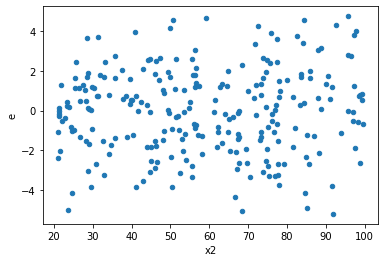

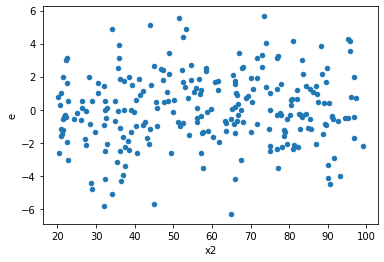

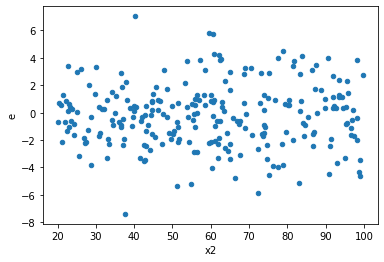

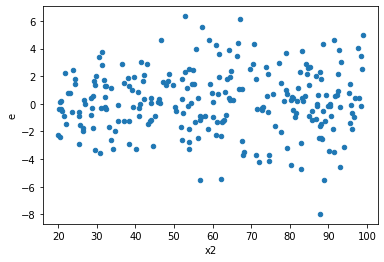

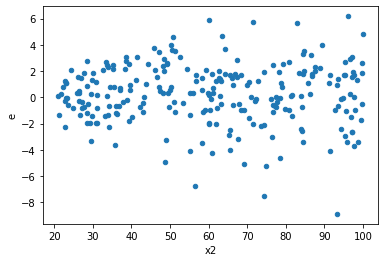

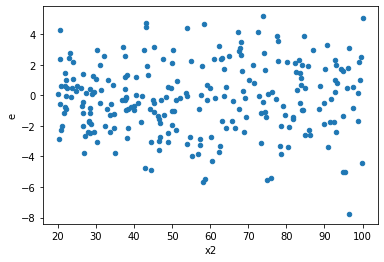

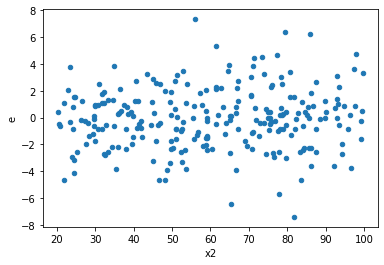

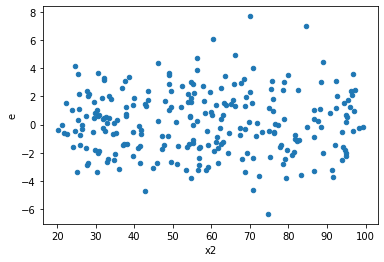

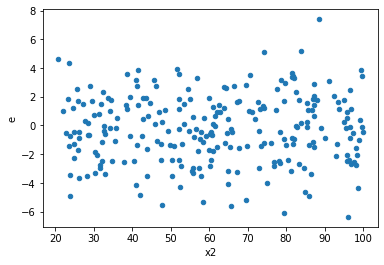

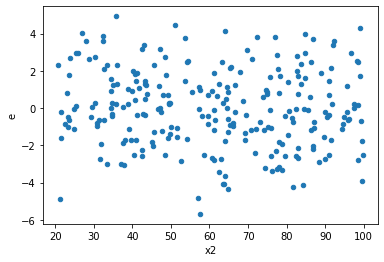

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,97.0,97.0,356.54242444821637,507.36430393226453,3.6756950974042923,5.230559834353243,1.423012435946324,0.08393458376661322,0.9580327081166934,0.04196729188330661,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,511.2898393298736,514.0048717706453,5.2710292714419955,5.299019296604591,1.0053101631050017,0.9792468166568193,0.5103765916715903,0.48962340832840967,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,463.365688220647,648.2684179447035,4.776965857944814,6.683179566440242,1.3990427742591267,0.09987306487504655,0.9500634675624767,0.04993653243752327,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,433.67984154407884,704.2033499725273,4.470926201485349,7.25982835023224,1.6237862185737602,0.01780978282233292,0.9910951085888335,0.00890489141116646,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,346.1591362489073,470.8743172770148,3.568650889163993,4.854374404917679,1.3602827947271932,0.1314642365756158,0.9342678817121921,0.0657321182878079,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,362.5571234183588,410.6159412484032,3.7377023032820493,4.233154033488693,1.1325551608996764,0.5410670726905682,0.7294664636547159,0.2705335363452841,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,436.20233485229954,600.9089839051506,4.496931287137109,6.194937978403615,1.37759231414619,0.11639603279413402,0.941801983602933,0.05819801639706701,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,400.83368725538736,472.27732306971564,4.132306054179251,4.868838382162017,1.1782376034896704,0.4207186989137939,0.7896406505431031,0.21035934945689694,Reject005=1 : Homoscedasticity
10.0,97.0,97.0,413.3988205316967,429.92227197940275,4.261843510636048,4.432188370921678,1.039969759532585,0.8473556478597617,0.5763221760701192,0.42367782392988085,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,547.4932837819001,424.27936116600245,5.644260657545362,4.3740140326392005,0.7749489787988316,0.21107827950460223,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,356.54242444821637,507.36430393226453,3.6756950974042923,5.230559834353243,1.423012435946324,0.08393458376661322,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,511.2898393298736,514.0048717706453,5.2710292714419955,5.299019296604591,1.0053101631050017,0.9792468166568193,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,463.365688220647,648.2684179447035,4.776965857944814,6.683179566440242,1.3990427742591267,0.09987306487504655,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,433.67984154407884,704.2033499725273,4.470926201485349,7.25982835023224,1.6237862185737602,0.01780978282233292,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,346.1591362489073,470.8743172770148,3.568650889163993,4.854374404917679,1.3602827947271932,0.1314642365756158,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,362.5571234183588,410.6159412484032,3.7377023032820493,4.233154033488693,1.1325551608996764,0.5410670726905682,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,436.20233485229954,600.9089839051506,4.496931287137109,6.194937978403615,1.37759231414619,0.11639603279413402,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,400.83368725538736,472.27732306971564,4.132306054179251,4.868838382162017,1.1782376034896704,0.4207186989137939,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      852
Reject005=0 : Heteroscedasticity    148
Name: Result_test, dtype: int64